In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [6]:
points_pkl = '/home/venky/P3PO/processed_data/points/gripper.pkl'
with open(points_pkl, 'rb') as f:
    points = pkl.load(f)

episode_list = points['episode_list']
# print(episode_list)
for episode in episode_list:
    print(episode)
    print(episode.shape)

tensor([[-0.8670,  0.3774,  1.2109,  ...,  0.7385,  1.7585,  1.7861],
        [-0.8584,  0.3739,  1.2018,  ...,  0.7194,  1.7108,  1.7379],
        [-0.8661,  0.3764,  1.2111,  ...,  0.7100,  1.6898,  1.7154],
        ...,
        [-0.5337,  0.2399,  0.8497,  ...,  0.3398,  0.8949,  0.9165],
        [-0.5409,  0.2432,  0.8622,  ...,  0.3572,  0.9326,  0.9546],
        [-0.5347,  0.2404,  0.8515,  ...,  0.3576,  0.9326,  0.9537]])
torch.Size([556, 18])
tensor([[-1.0085,  0.3816,  1.3724,  ...,  0.7713,  1.8366,  1.8807],
        [-1.0192,  0.3847,  1.3850,  ...,  0.7670,  1.8326,  1.8738],
        [-0.9889,  0.3730,  1.3443,  ...,  0.7483,  1.7877,  1.8279],
        ...,
        [-0.6419,  0.2382,  0.9182,  ...,  0.4557,  1.0904,  1.1219],
        [-0.6427,  0.2389,  0.9203,  ...,  0.4733,  1.1301,  1.1619],
        [-0.6515,  0.2417,  0.9320,  ...,  0.4845,  1.1535,  1.1873]])
torch.Size([512, 18])
tensor([[-1.0815,  0.5342,  1.9034,  ...,  1.2983,  1.8052,  1.8423],
        [-1.0975, 

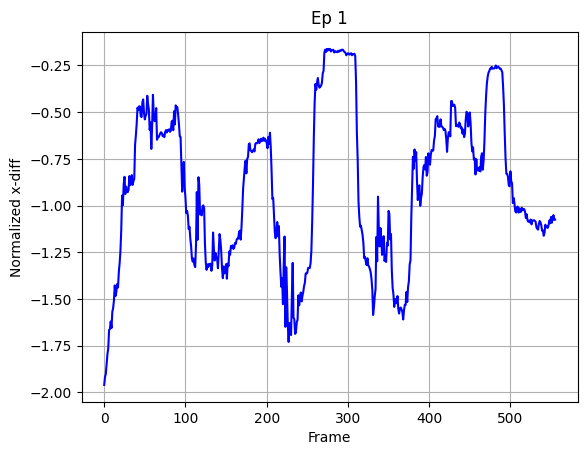

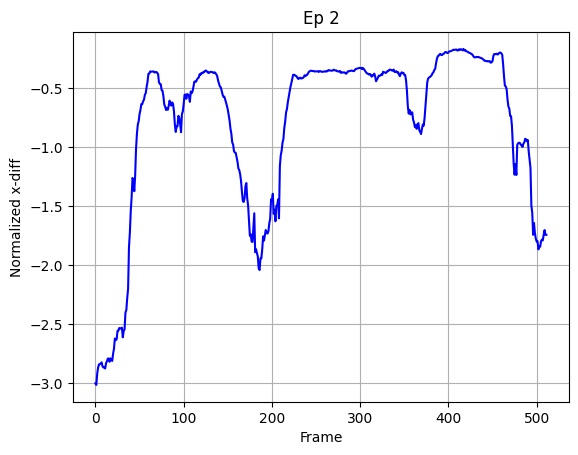

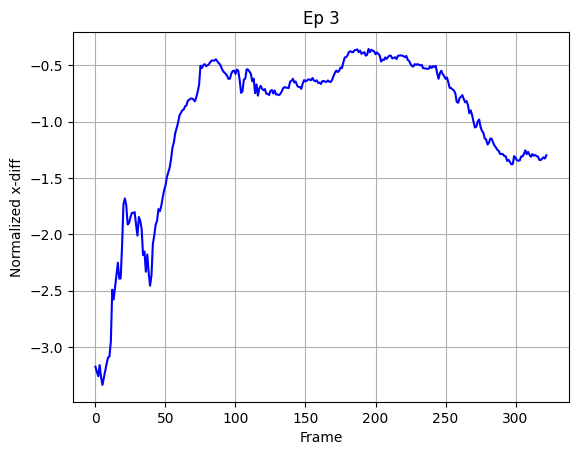

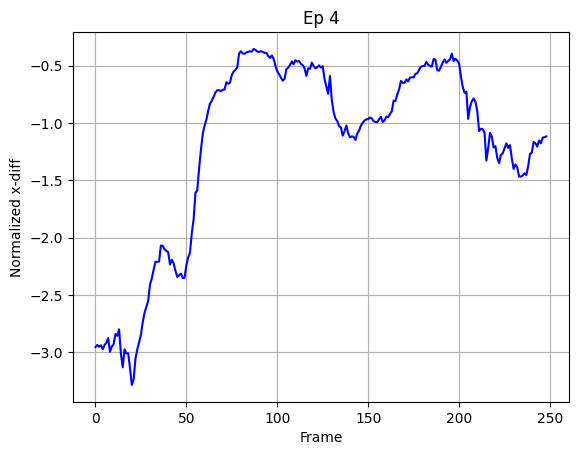

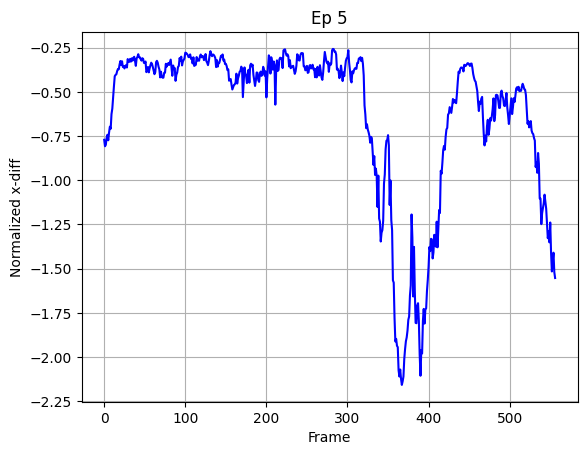

In [ ]:
import pickle as pkl
import torch
import matplotlib.pyplot as plt

points_pkl = '/home/venky/P3PO/processed_data/points/gripper.pkl'
with open(points_pkl, 'rb') as f:
    data = pkl.load(f)

episodes = data['episode_list']
u_thresh, l_thresh = -0.5, -1.5

for idx, ep in enumerate(episodes):
    ep = ep.reshape(ep.shape[0], -1, 3)
    x1, x2 = ep[:, 0, 0], ep[:, 1, 0]
    diff = x1 - x2
    norm = torch.zeros_like(diff)
    norm[diff >= u_thresh] = 0
    mask = (diff < u_thresh) & (diff > l_thresh)
    norm[mask] = 1 - (diff[mask] - l_thresh) / (u_thresh - l_thresh)
    norm[diff <= l_thresh] = 1

    plt.plot(diff, label=f"Ep {idx+1}", color="blue")
    plt.xlabel("Frame")
    plt.ylabel("Normalized x-diff")
    plt.title(f"Ep {idx+1}")
    plt.grid()
    plt.show()

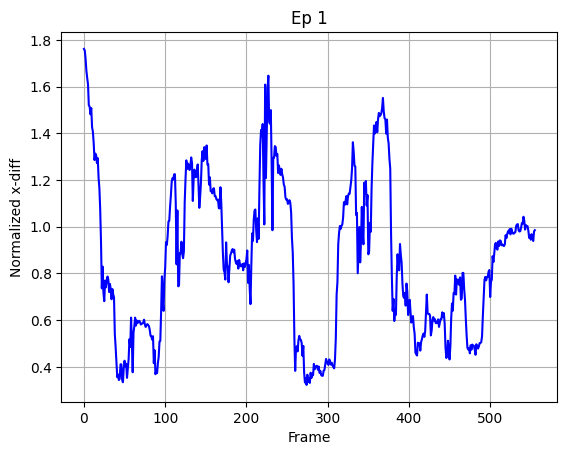

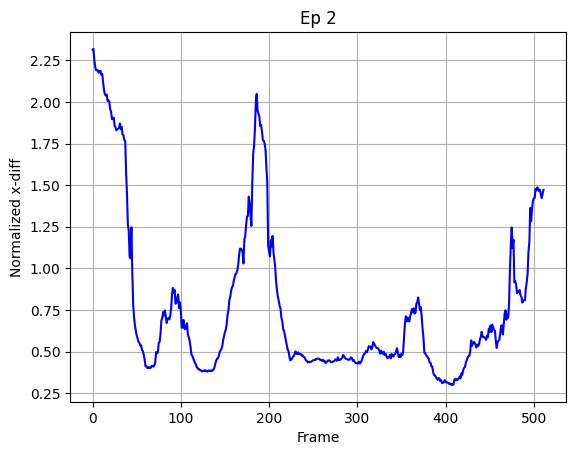

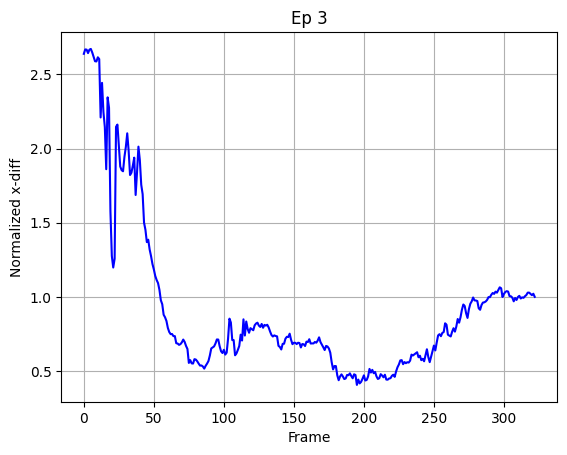

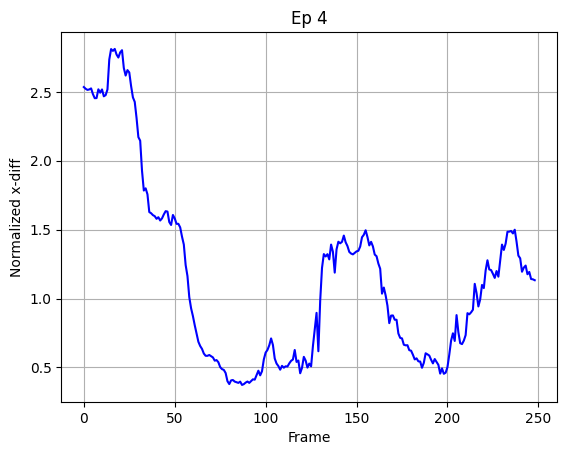

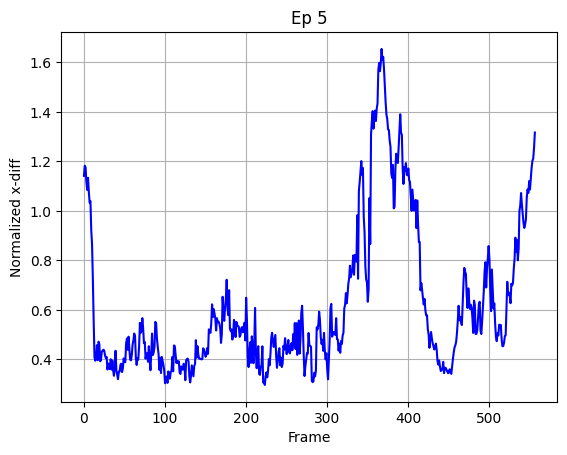

In [18]:
import pickle as pkl
import torch
import matplotlib.pyplot as plt

points_pkl = '/home/venky/P3PO/processed_data/points/gripper.pkl'
with open(points_pkl, 'rb') as f:
    data = pkl.load(f)

episodes = data['episode_list']
u_thresh, l_thresh = -0.75, -1.25

for idx, ep in enumerate(episodes):
    ep = ep.reshape(ep.shape[0], -1, 3)
    x3, x4 = ep[:, 2, 0], ep[:, 3, 0]  # Use points 3 and 4
    diff = x3 - x4
    norm = torch.zeros_like(diff)
    norm[diff >= u_thresh] = 0
    mask = (diff < u_thresh) & (diff > l_thresh)
    norm[mask] = 1 - (diff[mask] - l_thresh) / (u_thresh - l_thresh)
    norm[diff <= l_thresh] = 1

    plt.plot(diff, label=f"Ep {idx+1}", color="blue")
    plt.xlabel("Frame")
    plt.ylabel("Normalized x-diff")
    plt.title(f"Ep {idx+1}")
    plt.grid()
    plt.show()

In [19]:
labeled_points = '/home/venky/P3PO/coordinates/coords/gripper.pkl'
with open(labeled_points, 'rb') as f:
    data = pkl.load(f)
print(data)

[(0, 136.1994840928633, 472.9836629406707), (0, 836.1822871883061, 481.23817712811694), (0, 773.4479793637146, 619.0885640584695), (0, 188.20292347377472, 605.0558899398109), (0, 298.8134135855546, 713.1900257953569), (0, 681.822871883061, 714.0154772141015)]


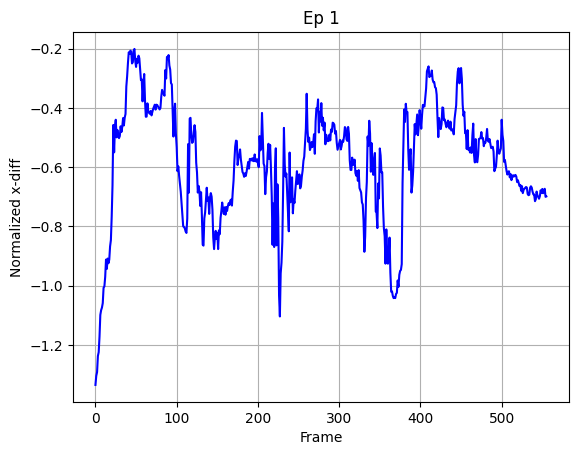

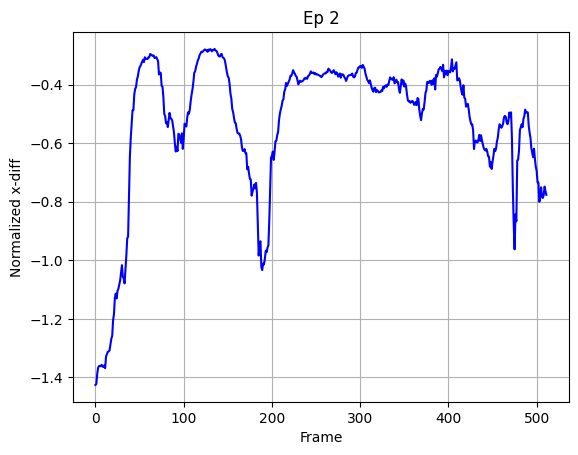

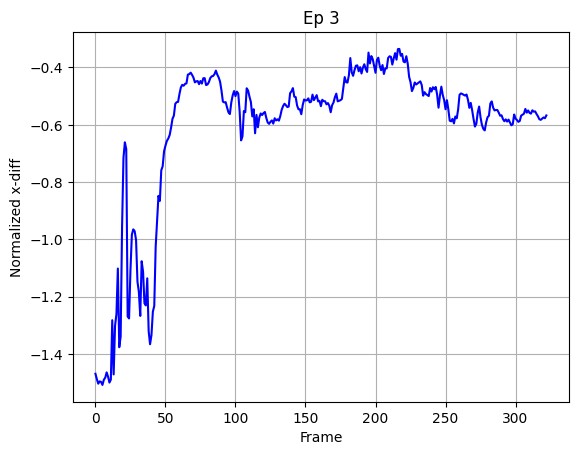

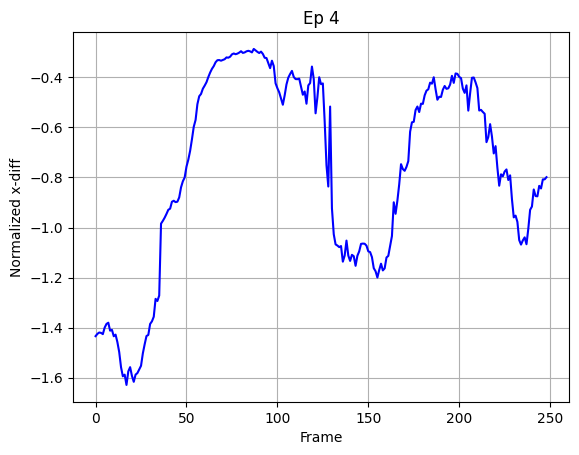

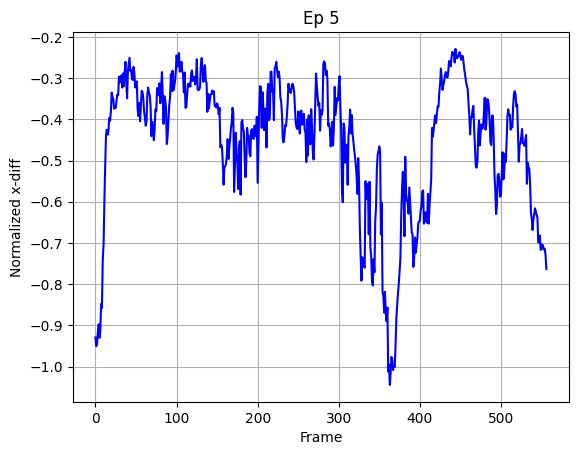

In [3]:
import pickle as pkl
import torch
import matplotlib.pyplot as plt

points_pkl = '/home/venky/P3PO/processed_data/points/gripper.pkl'
with open(points_pkl, 'rb') as f:
    data = pkl.load(f)

episodes = data['episode_list']
u_thresh, l_thresh = -0.75, -1.25

for idx, ep in enumerate(episodes):
    ep = ep.reshape(ep.shape[0], -1, 3)
    x4, x5 = ep[:, 4, 0], ep[:, 5, 0]  # Use points 4 and 5
    diff = x4 - x5
    norm = torch.zeros_like(diff)
    norm[diff >= u_thresh] = 0
    mask = (diff < u_thresh) & (diff > l_thresh)
    norm[mask] = 1 - (diff[mask] - l_thresh) / (u_thresh - l_thresh)
    norm[diff <= l_thresh] = 1

    plt.plot(diff, label=f"Ep {idx+1}", color="blue")
    plt.xlabel("Frame")
    plt.ylabel("Normalized x-diff")
    plt.title(f"Ep {idx+1}")
    plt.grid()
    plt.show()

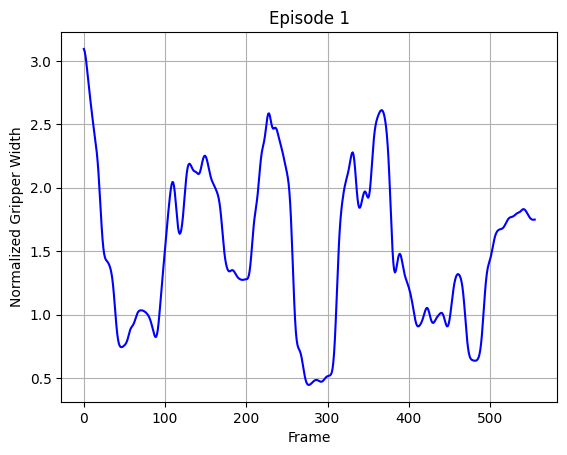

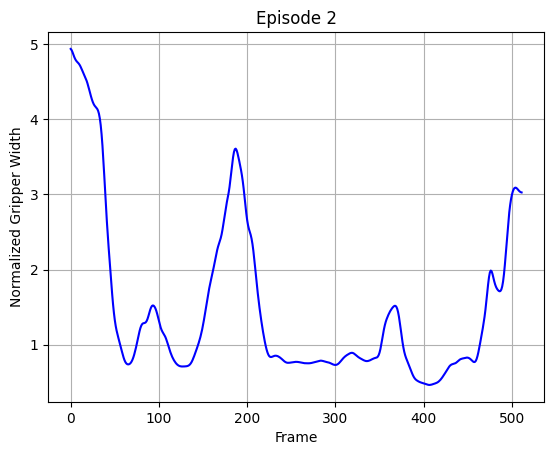

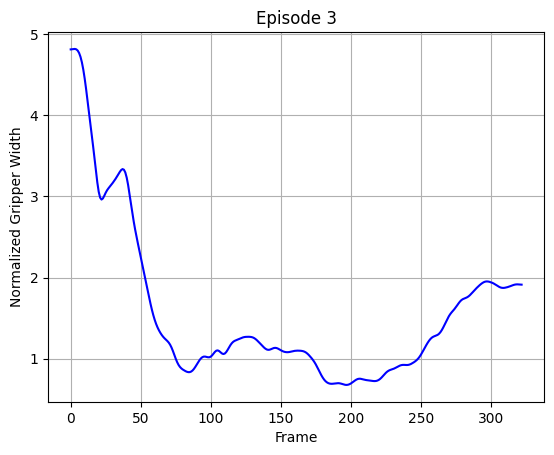

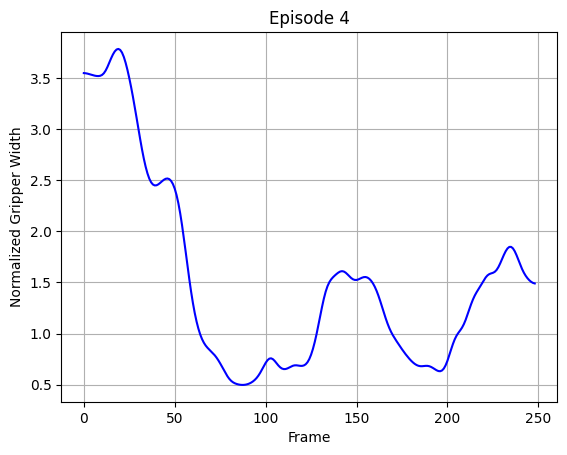

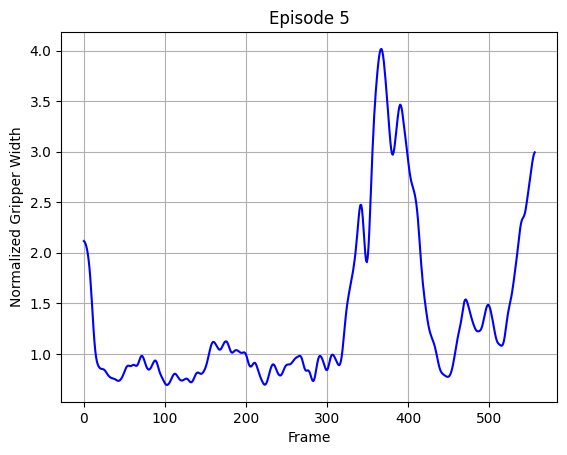

In [5]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

points_pkl = '/home/venky/P3PO/processed_data/points/gripper.pkl'
with open(points_pkl, 'rb') as f:
    data = pkl.load(f)

episodes = data['episode_list']

def smooth(data, sigma=2):
    return gaussian_filter1d(data, sigma=sigma)

for idx, ep in enumerate(episodes):
    ep = ep.reshape(ep.shape[0], -1, 3)  # Shape: (frames, 6 points, 3 (x, y, z))
    
    x0, x1 = ep[:, 0, 0], ep[:, 1, 0]
    x2, x3 = ep[:, 2, 0], ep[:, 3, 0]
    x4, x5 = ep[:, 4, 0], ep[:, 5, 0]
    
    x0, x1, x2, x3, x4, x5 = map(smooth, [x0, x1, x2, x3, x4, x5])
    
    width_tip = np.abs(x0 - x1)  # Top (tip) gripper width
    width_middle = np.abs(x2 - x3)  # Middle gripper width
    
    base_width = np.abs(x4 - x5)
    base_width_mean = np.mean(base_width)  # Average base width to reduce noise
    normalized_width = (width_tip + width_middle) / 2 / base_width_mean  # Combined and normalized
    
    normalized_width = smooth(normalized_width)
    
    plt.plot(normalized_width, label=f"Ep {idx+1}", color="blue")
    plt.xlabel("Frame")
    plt.ylabel("Normalized Gripper Width")
    plt.title(f"Episode {idx+1}")
    plt.grid()
    plt.show()